# seaborn可视化(2) — 分类
类型|	函数|	说明
--|:--:|--:
散点图	|catplot(x,y,data) 默认kind = 'scatter'|	catplot()默认为散点图
散点图|catplot(x,y,data,kind = 'strip')	|画一个散点图，其中一个变量是分类的
散点图|catplot(x,y,data,kind = 'swarm')	|画一个没有重叠点的分类散点图
分布图	|catplot(x,y,data,kind = 'box') 箱型图	|画一个箱型图来显示与类别相关的分布
分布图|catplot(x,y,data,kind = 'boxen') 改进箱型图	|为较大的数据集绘制增强的箱型图
分布图|catplot(x,y,data,kind = 'violin') 小提琴图	|绘制箱线图和核密度估计的组合
其他|	catplot(x,y,data,kind = 'bar') 条形图	|将点估计和置信区间显示为矩形条
其他|catplot(x,y,data,kind = 'count') 条形计数图	|使用条形图显示每个分类库中的观察计数
其他|catplot(x,y,data,kind = 'point') 点线图	|使用散点图符号显示点估计和置信区间

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set(font = 'SimHei')
sns.set(font_scale=1.5)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


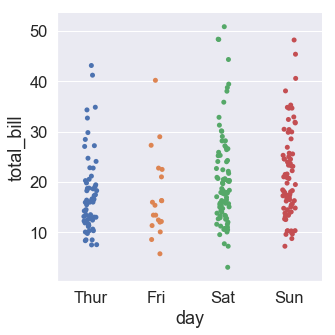

In [4]:
"""
sns.catplot(
    ['x=None', 'y=None', 'hue=None', 'data=None', 'row=None', 'col=None',
    'col_wrap=None', 'estimator=<function mean at 0x000001A2D75D2950>',
    'ci=95', 'n_boot=1000', 'units=None', 'order=None', 'hue_order=None', 
    'row_order=None', 'col_order=None', "kind='strip'", 'height=5',
    'aspect=1', 'orient=None', 'color=None', 'palette=None', 'legend=True', 
    'legend_out=True', 'sharex=True', 'sharey=True', 'margin_titles=False',
    'facet_kws=None', '**kwargs'],)
"""
#默认情况
sns.catplot(x="day", y="total_bill", data=tips)

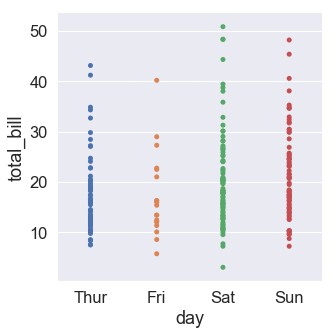

In [6]:
#jitter : 控制数据抖动
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

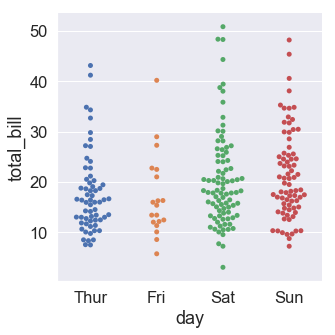

In [9]:
"""
第二种方法使用防止重叠的算法沿分类轴调整点。虽然它只适用于相对较小的数据集,
但它可以更好地表示观测值的分布。这种情节有时被称为“beeswarm”，
由swarmplot()在seaborn中绘制，在catplot()中设置kind=“swarm”激活swarmplot()
"""
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

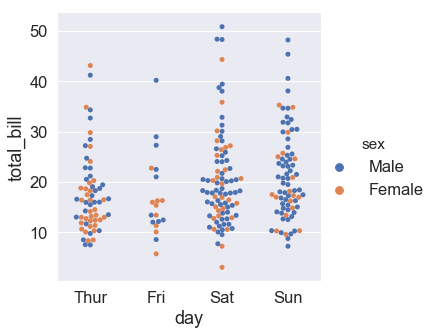

In [11]:
#hue : 分组类别
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

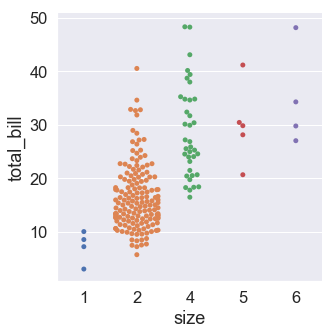

In [12]:
#筛选数据
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))

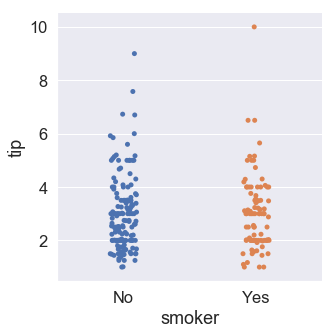

In [13]:
#指定顺序
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

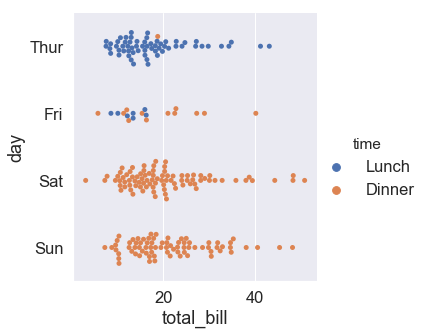

In [14]:
#轴序
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

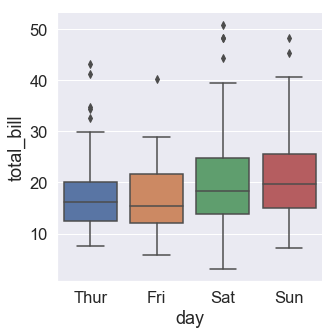

In [15]:
#类别的分布
#箱型图
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

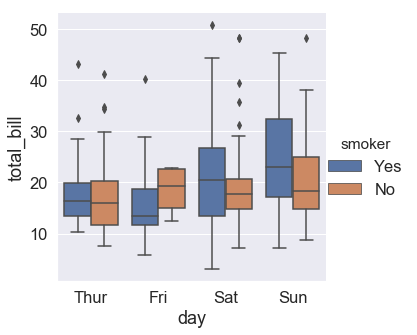

In [16]:
# hue : 类间分类
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

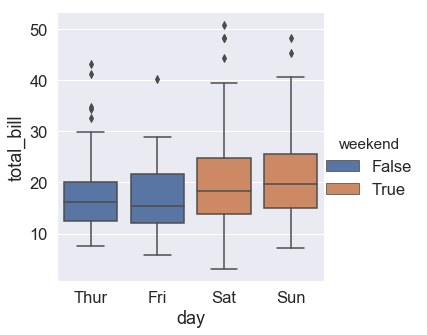

In [17]:
# 指定分组
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

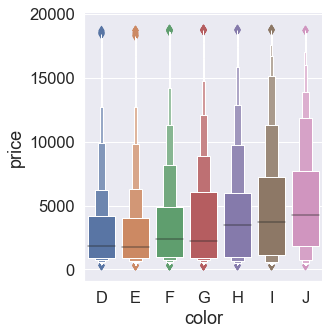

In [19]:
"""
一个相关的函数boxenplot()绘制了一个类似于箱形图的图，但是经过了优化，
可以显示关于分布形状的更多信息。它最适合较大的数据集:
"""
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))


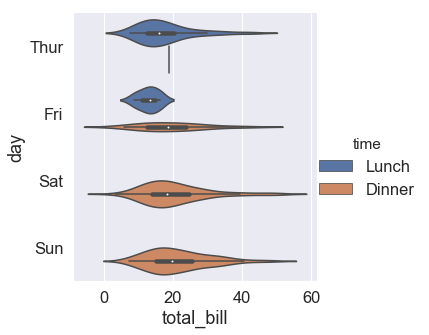

In [21]:
#小提琴图：结合了箱线图和分布教程中描述的内核密度估计过程
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

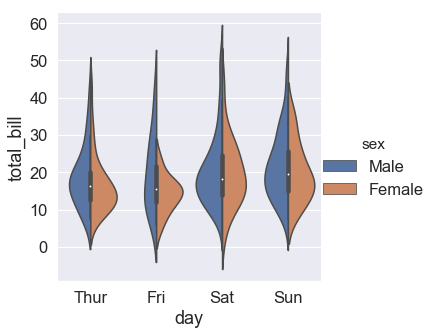

In [22]:
#分割小提琴
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

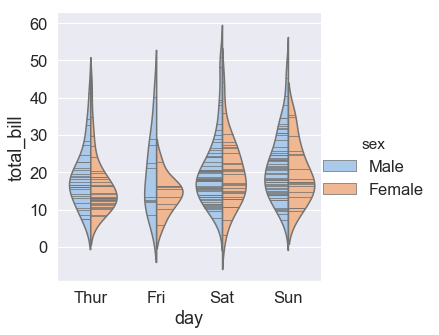

In [23]:
#显示每个单独数据的观察值
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips)


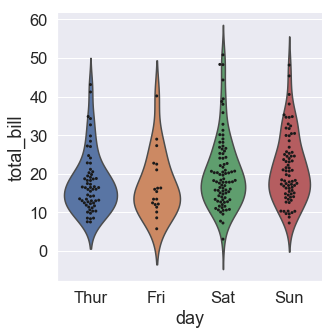

In [24]:
#结合散点图和小提琴图
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

In [29]:
#类别内统计估计
#barplot:条形图
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


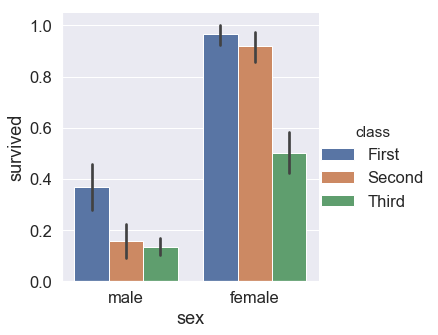

In [30]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

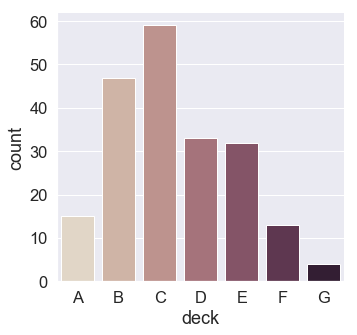

In [31]:
#countplot() :使用条形图显示每个分类库中的观察计数
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

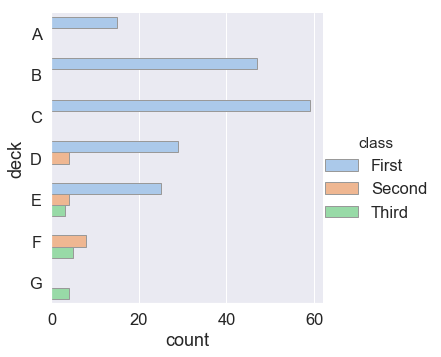

In [32]:
#计数分组
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

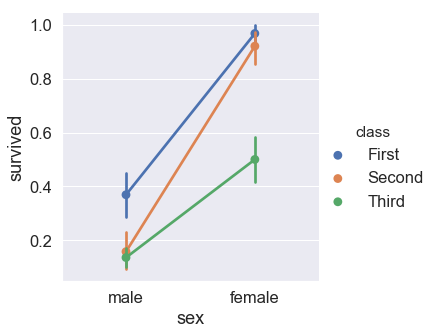

In [33]:
#pointplot :使用散点图符号显示点估计和置信区间
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

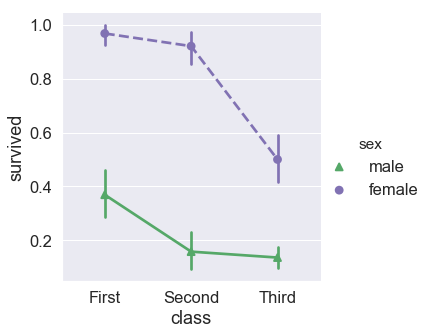

In [35]:
#指定风格
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

In [36]:
#
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


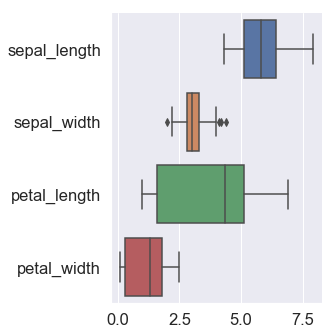

In [37]:
sns.catplot(data=iris, orient="h", kind="box")

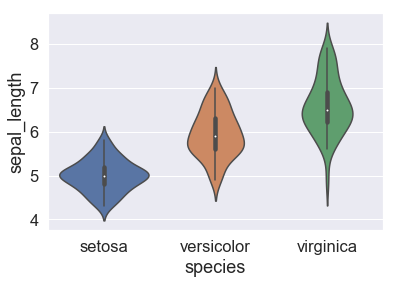

In [39]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

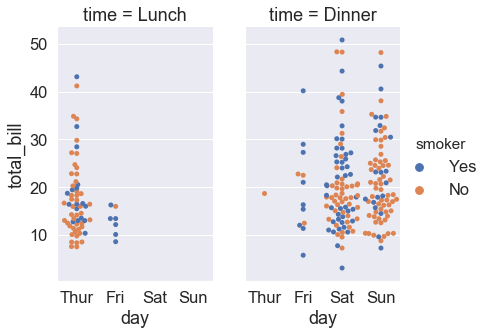

In [41]:
#多关系
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

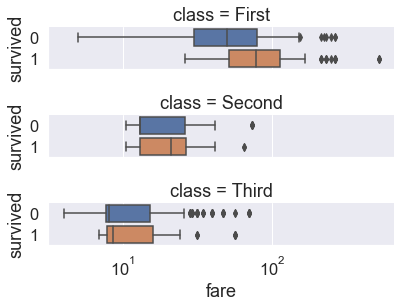

In [42]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")